## Tasks - Fundamentals of Data Analysis

### Course: HDip in Computing in Data Analytics
### Module:  Fundamentals of Data Analysis
### Lecturer: Ian McLoughlin
### Student: Sarah Hastings 

1. Collatz conjecture

2. Give an overview of the famous penguins data set, explaining the types of variables it contains. Suggest the types of variables that should be used to model them in Python, explaining your rationale.

3. For each of the variables in the penguins data set, suggest what probability distribution from the numpy random distributions list is the most appropriate to model the variable.

4. Suppose you are flipping two coins, each with a probability p of giving heads. Plot the entropy of the total number of heads versus p.

5. Create an appropriate individual plot for each of the variables in the penguin data set.5


The Collatz conjecture is a famous unsolved problem in mathematics. The problem is to prove that if you start with any positive integer x and repeatedly apply the function f(x) below, you always get stuck in the repeating sequence 1, 4, 2, 1, 4, 2, . . .

\[
f(n) = 
\begin{cases}
\frac{n}{2}, & \text{if } n \text{ is even} \\
3n + 1, & \text{if } n \text{ is odd}
\end{cases}
\]


For example, starting with the value 10, which is an even number,
we divide it by 2 to get 5. Then 5 is an odd number so, we multiply by 3 and add 1 to get 16. Then we repeatedly divide by 2 to
get 8, 4, 2, 1. Once we are at 1, we go back to 4 and get stuck in the
repeating sequence 4, 2, 1 as we suspected.
Your task is to verify, using Python, that the conjecture is true for
the first 10,000 positive integers.

## Task 1 


> block qutoe 

put in laytex notation for fx 

x = 5

1st investigation of task

write function to test when you start you end up with 1

def collatz_test(x):
print(f'Testing Collatz with initial value {x}')
while x! = 1:
x = f(x)
print(x)
print(x, end=' ')
print(x, end=', ')

or 

def collatz_test(x):
while x! = 1:
print(x, end=', ')
x = f(x)
print(x)

collatz(5)

next step loop collatz with all positive integer less than 10000
need more comments
bones of task

quote doc  > copy paste edit 

1st task

collatz - positive integer up to infinity
think true
cant prove it
logical way to show always true

x - any inital positive integer
if x even /2
if odd x3 +1
output back into function
once we get to 1
cycle of 1  4 2 infinitive loop 
no matter what positive integer you start with you will end up with loop of 1 and loop 1 4 2 1
no one able to prove it is true


In [5]:
#This program asks the user to input any positive integer and outputs the successive values of the following calculation.
#At each step calculate the next value by taking the current value 
#And, if it is even, divide it by two, 
#But if it is odd, multiply it by three and add one.
#Have the program end if the current value is one.
#References:  https://www.w3schools.com/python/ref_func_print.asp 
            #https://data-flair.training/blogs/python-operator/  
            #https://github.com/HenkT28/pands-problem-set/blob/master/collatz.py 
            #https://www.w3schools.com/python/ref_func_print.asp 

#n allows user to enter a number
n = int(input("Please enter a positive integer: "))


while n !=1:                    #While loop will continue until n is 1   
    print(n, end= ' ')
    if n % 2 == 0:              # A number is even if division by 2 gives a remainder of 0   
        n = n // 2              # To avoid decimal, use floor division with, this will always give a integer value    
                                # https://data-flair.training/blogs/python-operator/    
    else:
        n = n * 3 + 1           #Else is needed for odd numbers, where remainder is 1, multiply *3 +1 
else:
        print(n, end= ' ')      #end= ' ' allows you choose what you want to be printed after the print statement has been executed
                                




Please enter a positive integer: 3
3 10 5 16 8 4 2 1 

## Task 2


> penguins var

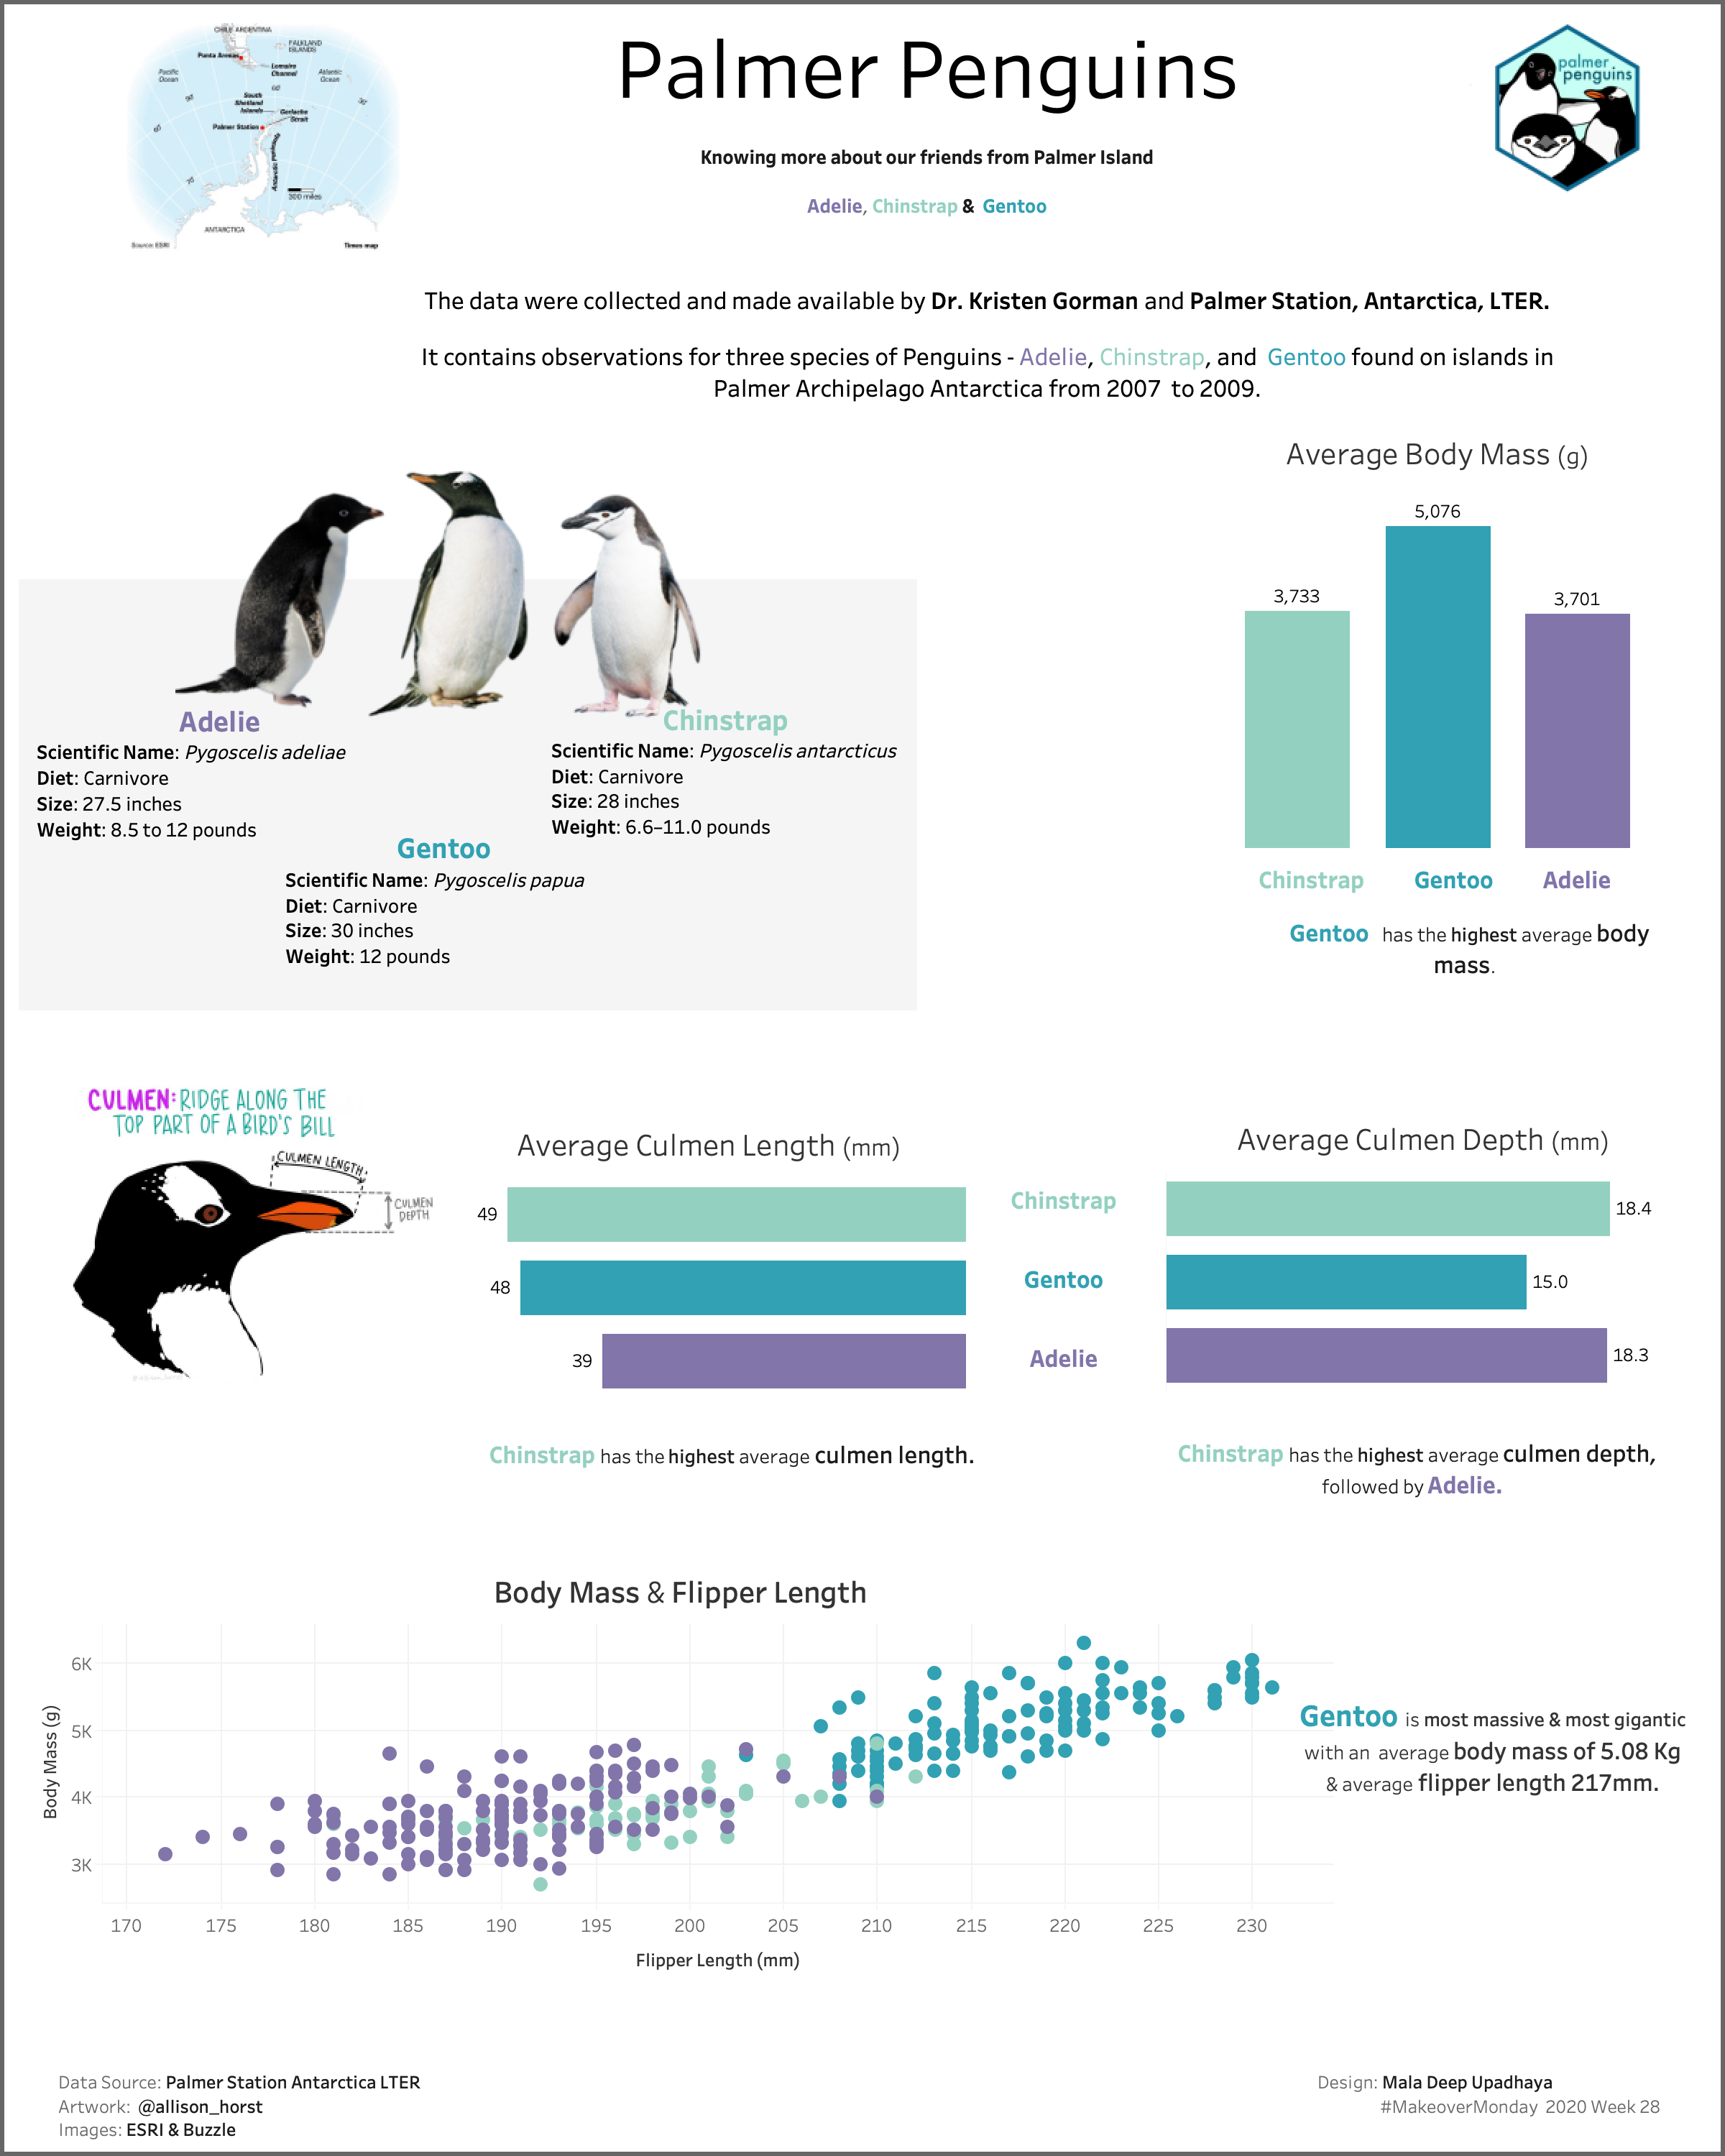

![Penguins](https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/lter_penguins.png)

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://github.com/mwaskom/seaborn-data/raw/master/penguins.csv')

In [4]:
print(df)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2     

In [11]:
## Summary of the data 

#print(df.shape)
#print(df.head())
#print(df.tail())
#print(df.info())
#print(df.describe())
#print(df.nunique())
#print(df.isnull())
#print(df.isnull().any())
print(df.isnull().sum())
#print(df['species'].value_counts())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


The dataset consists of 7 columns.

species: penguin species (Chinstrap, Adélie, or Gentoo)

island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)

sex: penguin sex

bill_length_mm: bill length (mm)

bill_depth_mm: bill depth (mm)

flipper_length_mm: flipper length (mm)

body_mass_g: body mass (g)

3 of these are categorical ( species , island , sex ) while the rest are numeric.

![Body parts](https://previews.123rf.com/images/hermandesign2015/hermandesign20151904/hermandesign2015190400312/121076706-diagram-showing-body-part-of-penguin.jpg)

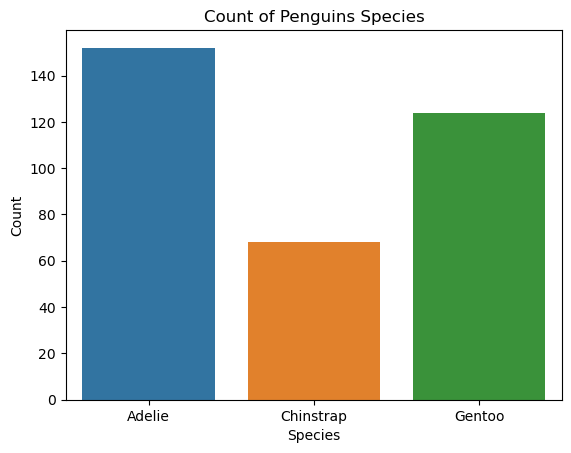

In [17]:
# Countplot for species
sns.countplot(x="species", data=df)
plt.title("Count of Penguins Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

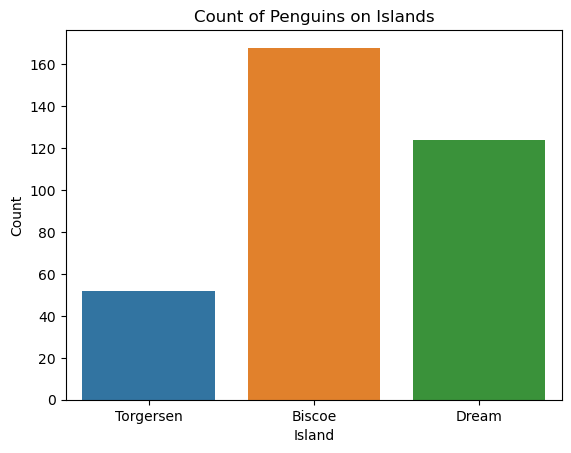

In [19]:
# Countplot for island
sns.countplot(x="island", data=df)
plt.title("Count of Penguins on Islands")
plt.xlabel("Island")
plt.ylabel("Count")
plt.show()

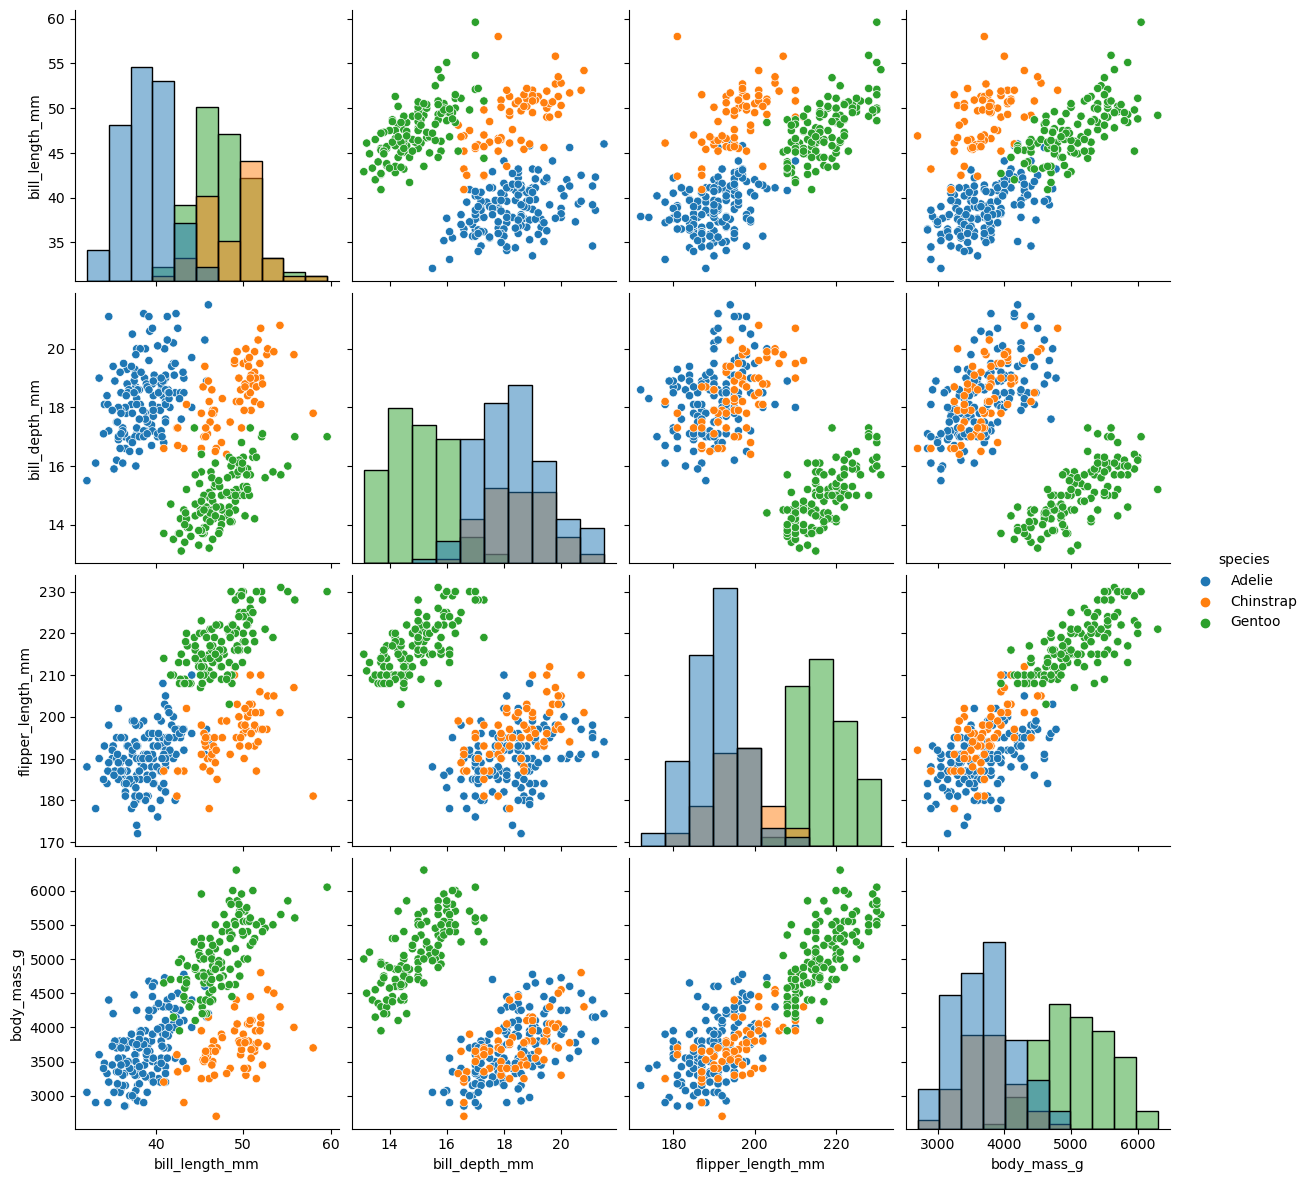

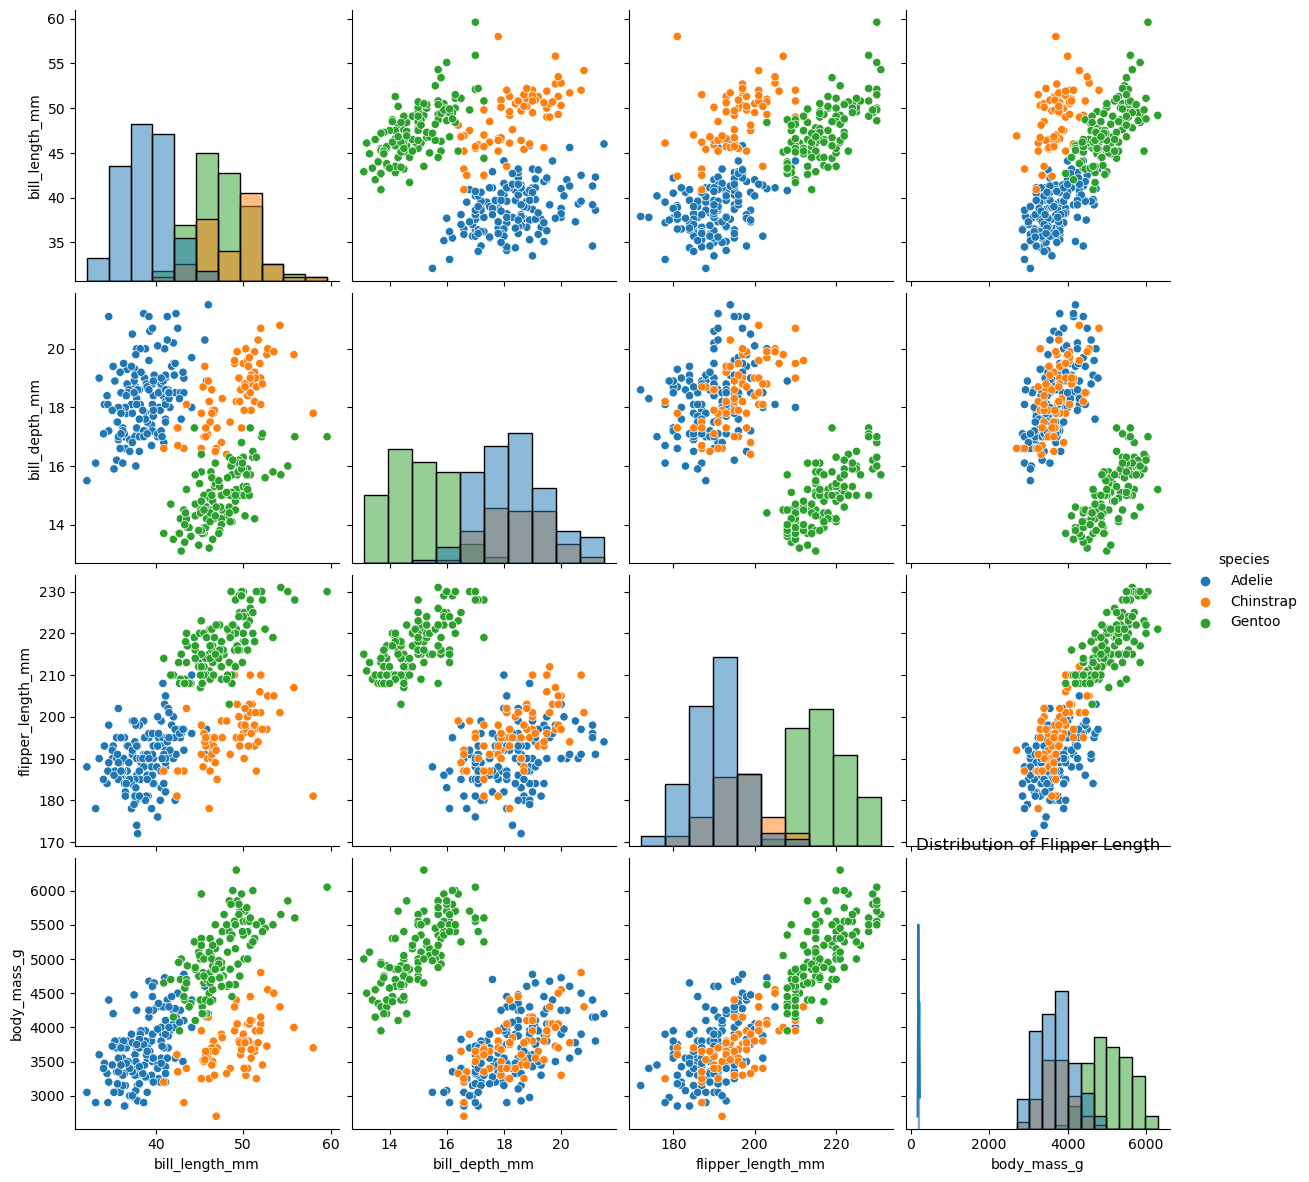

In [15]:
# Plot for flipper_length_mm
sns.histplot(df["flipper_length_mm"], kde=True)
plt.title("Distribution of Flipper Length")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Frequency")
plt.show()

In [22]:
sns.pairplot(df, hue="species", size=3,diag_kind="hist"

SyntaxError: unexpected EOF while parsing (2744677820.py, line 1)

## Task 4

> Suppose you are flipping two coins, each with a probability p of giving heads. Plot the entropy of the total number of heads versus p. 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Flipping two coins.
flip_two_coins = np.random.binomial(2, 0.5)

# Print the result
print("Result of coin flips:", flip_two_coins)

Result of coin flips: 0


In [10]:
# Entropy as above.
def H(p):
  return -(1 - p) * np.log2(1.0 - p) - p * np.log2(p)

In [11]:
# Entropy of 0.5.
H(0.5)

1.0

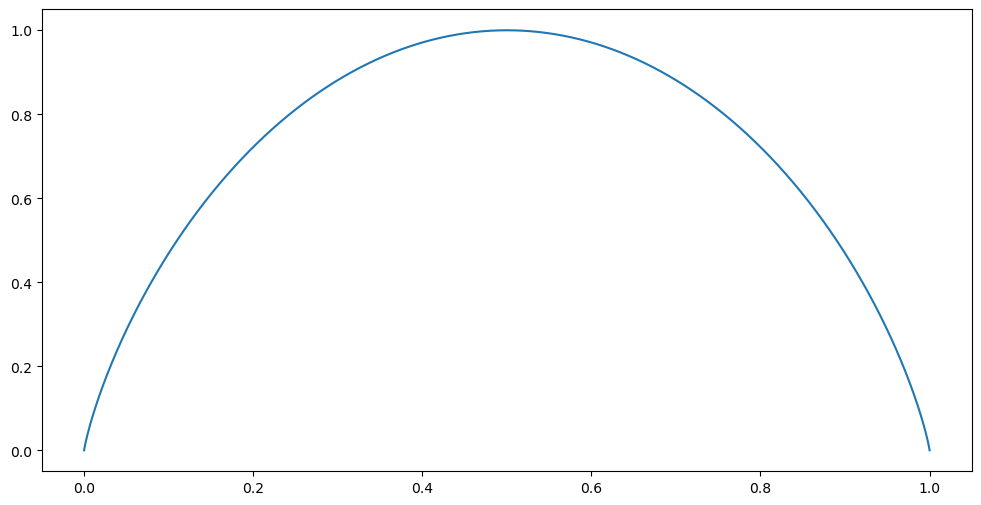

In [12]:
# Create an empty plot.
fig, ax = plt.subplots(figsize=(12,6))

# p is a probability.
p = np.linspace(0.00000001, 0.99999999, 10001)

# Plot H(p).
ax.plot(p, H(p));

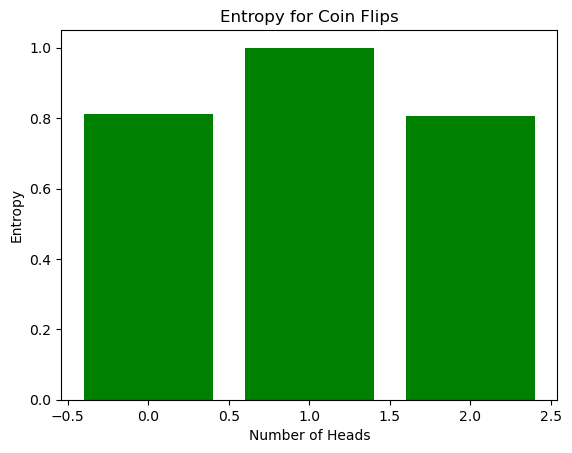

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def H(p):
    return -(1 - p) * np.log2(1.0 - p) - p * np.log2(p)

# Probability of heads on a single coin flip
p_heads = 0.5

# Number of trials (coin flips)
num_trials = 2

# Simulate coin flips
rand_coins = np.random.binomial(num_trials, p_heads, size=10000)

# Calculate probabilities of each outcome
probabilities = [np.sum(rand_coins == i) / len(rand_coins) for i in range(num_trials + 1)]

# Calculate entropy using the H(p) function
entropy_values = [H(p) for p in probabilities]

# Plot
plt.bar(range(num_trials + 1), entropy_values, color='green')
plt.title('Entropy for Coin Flips')
plt.xlabel('Number of Heads')
plt.ylabel('Entropy')
plt.show()


In [18]:
import numpy as np
def coinFlip(p):    
    #perform the binomial distribution (returns 0 or 1)    
    result = np.random.binomial(1,p)
#return flip to be added to numpy array    
    return result
'''Main Area'''
#probability of heads vs. tails. This can be changed.
probability = .5
#num of flips required. This can be changed.
n = 10
#initiate array
fullResults = np.arange(n)
#perform desired numbered of flips at required probability set above
for i in range(0, n):    
    fullResults[i] = coinFlip(probability)    
    i+=1
#print results
print("probability is set to ", probability)
print("Tails = 0, Heads = 1: ", fullResults)
#Total up heads and tails for easy user experience 
print("Head Count: ", np.count_nonzero(fullResults == 1))
print("Tail Count: ", np.count_nonzero(fullResults == 0))

probability is set to  0.5
Tails = 0, Heads = 1:  [1 0 0 1 1 0 0 0 0 1]
Head Count:  4
Tail Count:  6


## Task 5

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


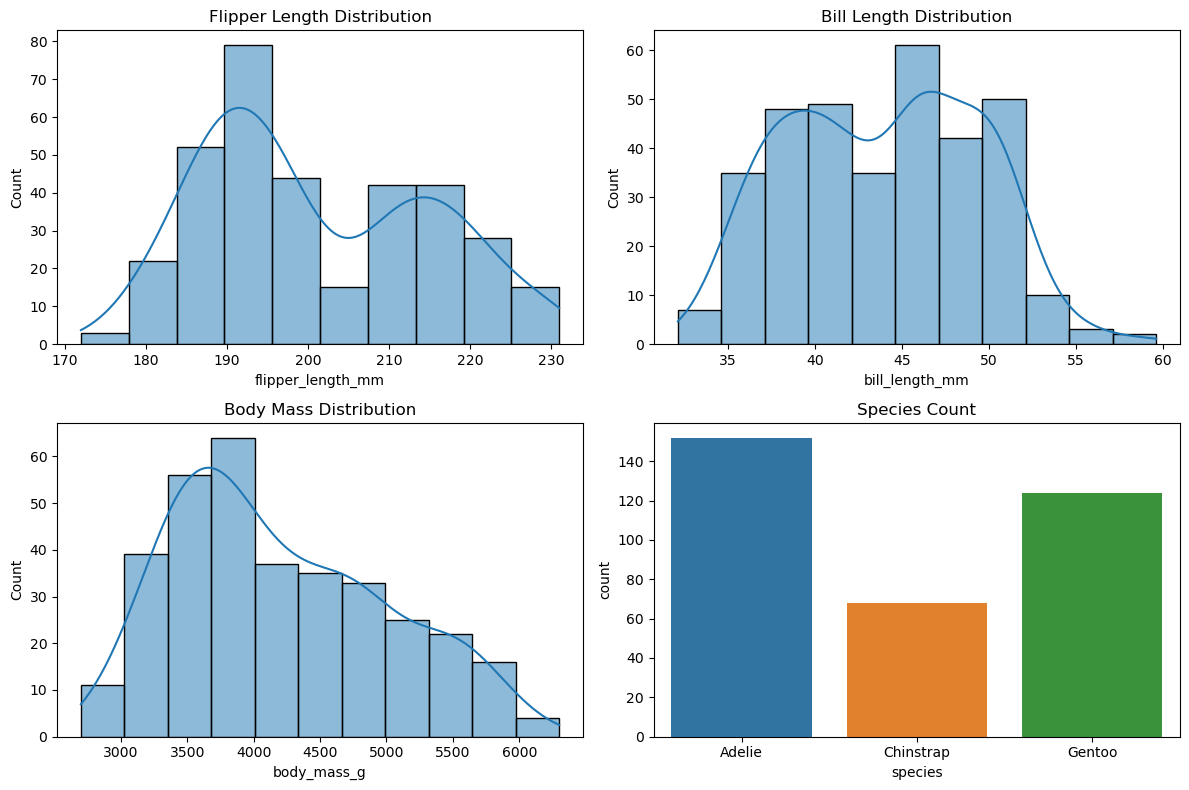

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Display the first few rows of the dataset to see the variables
print(penguins.head())

# Plot individual variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Individual variable plots 

sns.histplot(penguins['flipper_length_mm'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Flipper Length Distribution')

sns.histplot(penguins['bill_length_mm'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Bill Length Distribution')

sns.histplot(penguins['body_mass_g'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Body Mass Distribution')

sns.countplot(x=penguins['species'], ax=axes[1, 1])
axes[1, 1].set_title('Species Count')

plt.tight_layout()
plt.show()


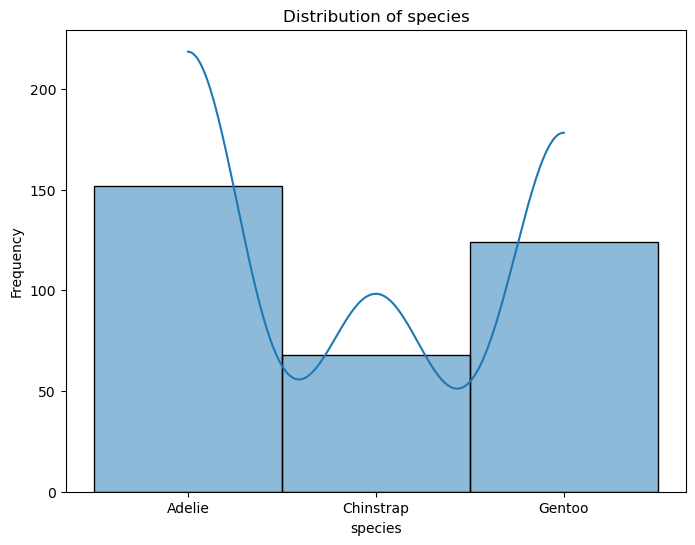

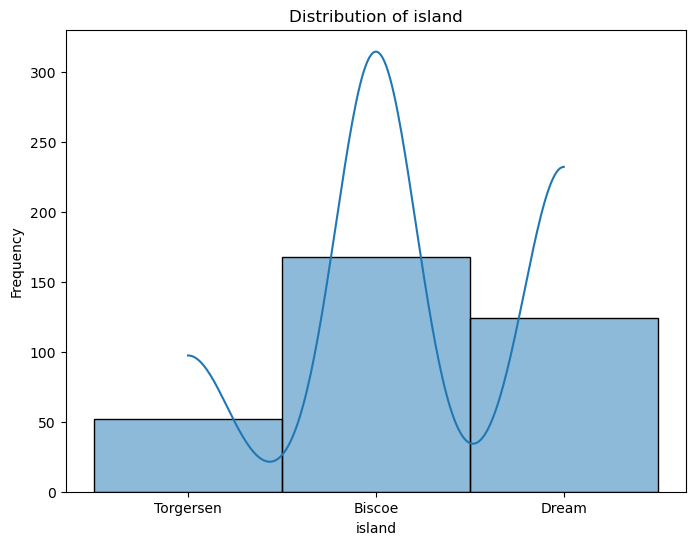

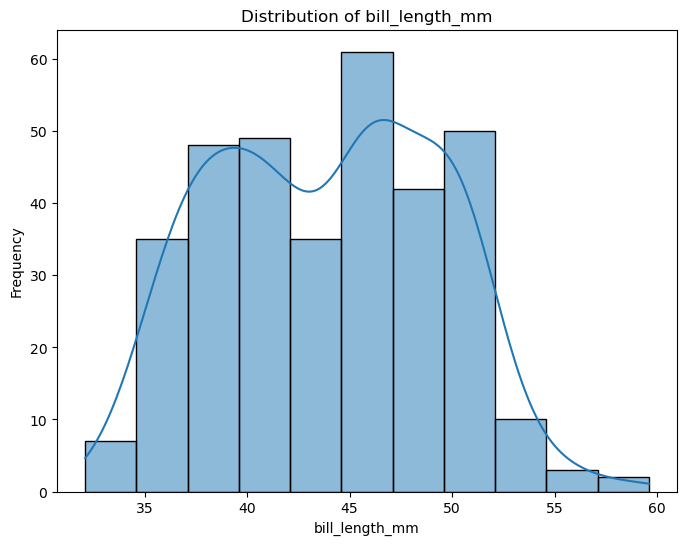

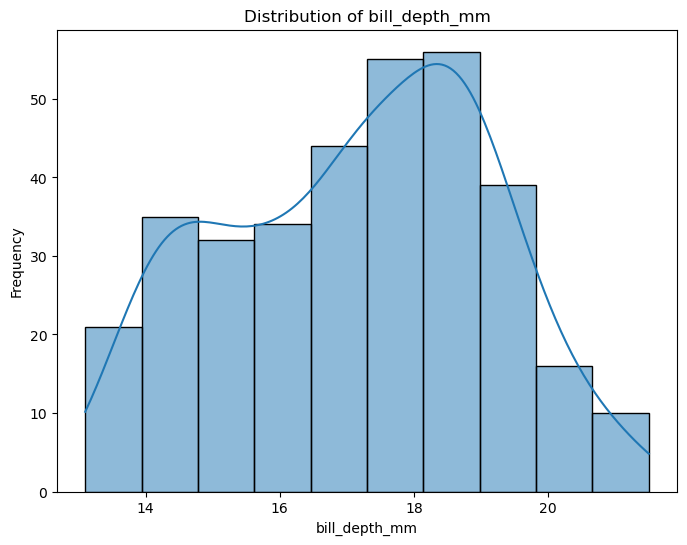

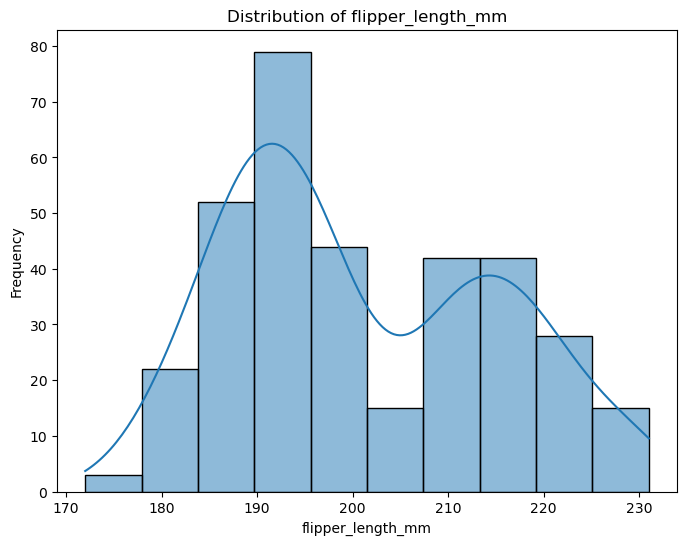

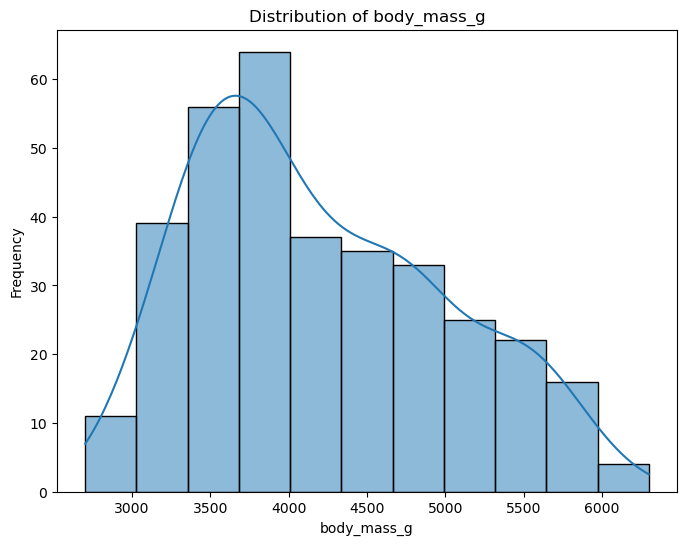

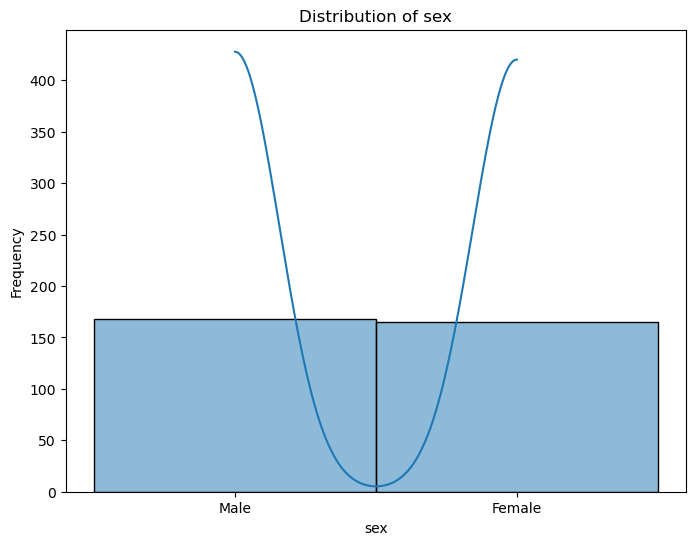

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Get the list of variable names (columns)
variables = penguins.columns

# Create individual plots for each variable
for variable in variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(penguins[variable], kde=True)
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.show()



## References 
* [w3schools pandas cleaning data](https://www.w3schools.com/python/pandas/pandas_cleaning.asp)
* [Scikit-learn SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)
* [Numpy distributions](https://numpy.org/doc/stable/reference/random/generator.html#distributions)


## End